<a href="https://colab.research.google.com/github/AmirHoseein99/Ai-Entrance-Exam/blob/master/machine_learning/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget "https://raw.githubusercontent.com/ishan-open/ai-entrance-exam/main/machine-learning/data.csv"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv("/content/data.csv")
print(data.shape)
data.head()

(2651, 2)


,question,label
0,طارند بالا ، چه چیزی است؟,1
1,طارند بالا ، روستایی از توابع کجا است؟,1
2,طارند بالا ، روستایی از توابع کجا در استان ته...,1
3,طارند بالا ، روستایی از توابع بخش جلیل آباد ش...,1
4,کجا روستایی در استان تهران ایران است,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2651 non-null   object
 1   label     2651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB


In [ ]:
questions = data.question.to_numpy()
labels = data.label.to_numpy()
labels = [0 if(label) == -1 else label for label in labels]

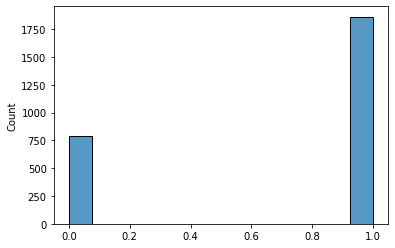

In [ ]:
_ = sns.histplot(labels)

In [ ]:
Question_tokens = Tokenizer()
Question_tokens.fit_on_texts(questions)
encoded_questions = np.array(Question_tokens.texts_to_sequences(questions), dtype=object)
word_index = Question_tokens.word_index
vocab = np.array(list(word_index.keys()))
vocab_size = len(vocab)
print("Number fo Unique Tokens is : ", vocab_size)

Number fo Unique Tokens is :  1750


In [ ]:
all_tokens = np.array([token for questions in encoded_questions for token in  questions])
all_tokens.shape

(35228,)

Most Common Tokens are :  است در کجا چه از و یک که است؟ کسی شهرستان استان ایران روستایی بخش توابع شده ، واقع به


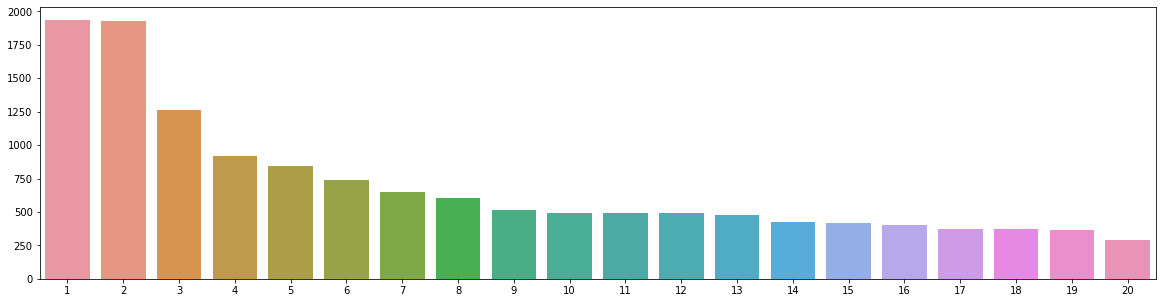

In [ ]:
values, counts = np.unique(all_tokens, return_counts=True)
top_values = values[:20]
top_vlaues_counts = counts[:20]
print("Most Common Tokens are : ", Question_tokens.sequences_to_texts([top_values])[0])
_ = plt.figure(figsize=(20, 5))
_ = sns.barplot(x=top_values, y=top_vlaues_counts)

In [ ]:
lengths=[]
for k in range(len(encoded_questions)):
  lengths.append(len(encoded_questions[k]))
pd.DataFrame(lengths, columns=['Lenghts']).describe()

,Lenghts
count,2651.000000
mean,13.288570
std,5.274154
min,0.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,28.000000


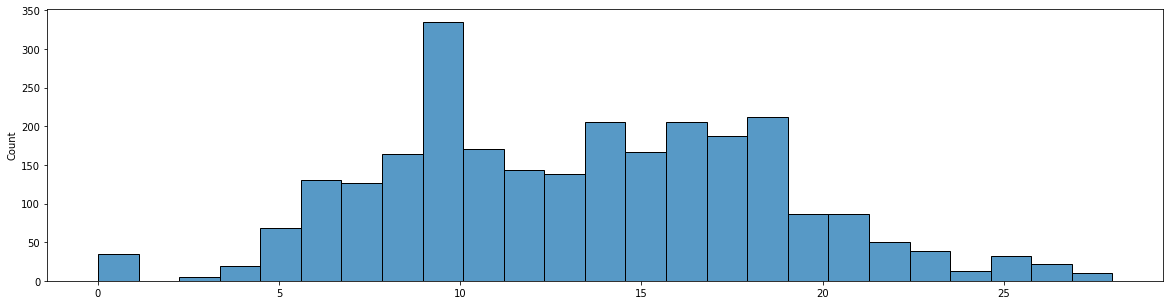

In [ ]:
plt.figure(figsize=(20, 5))
_ = sns.histplot(lengths)

In [ ]:
max_length = 20
trunc_type = 'post'
padding_type = 'post'
question_padded = pad_sequences(encoded_questions, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
labels.unique()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(question_padded, labels, test_size=.1)

In [ ]:
callbacks = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
embed_size = 10
oob = 300
model= keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size + oob, embed_size, input_shape=[20]))
model.add(keras.layers.GRU(8, dropout=.5))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 10)            20500     
                                                                 
 gru_5 (GRU)                 (None, 8)                 480       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,989
Trainable params: 20,989
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['accuracy', keras.metrics.AUC()]
                )
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size = 32,
                    validation_split=0.1, callbacks = callbacks)

Epoch 1/20
68/68 [==============================] - 6s 29ms/step - loss: 0.6476 - accuracy: 0.6757 - auc_1: 0.5211 - val_loss: 0.6350 - val_accuracy: 0.6653 - val_auc_1: 0.5712
Epoch 2/20
68/68 [==============================] - 1s 13ms/step - loss: 0.5996 - accuracy: 0.7027 - auc_1: 0.5925 - val_loss: 0.6332 - val_accuracy: 0.6653 - val_auc_1: 0.6311
Epoch 3/20
68/68 [==============================] - 1s 13ms/step - loss: 0.5877 - accuracy: 0.7027 - auc_1: 0.6534 - val_loss: 0.6164 - val_accuracy: 0.6695 - val_auc_1: 0.6805
Epoch 4/20
68/68 [==============================] - 1s 13ms/step - loss: 0.5518 - accuracy: 0.7190 - auc_1: 0.7446 - val_loss: 0.5595 - val_accuracy: 0.7029 - val_auc_1: 0.7598
Epoch 5/20
68/68 [==============================] - 1s 13ms/step - loss: 0.4787 - accuracy: 0.7623 - auc_1: 0.8096 - val_loss: 0.5178 - val_accuracy: 0.7406 - val_auc_1: 0.7871
Epoch 6/20
68/68 [==============================] - 1s 13ms/step - loss: 0.4314 - accuracy: 0.7978 - auc_1: 0.8589 

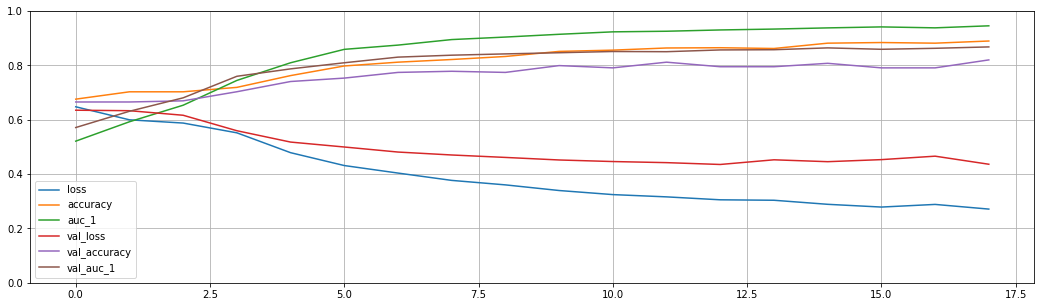

In [ ]:
pd.DataFrame(history.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()